## 実験概要
DC-SGDにおけるサンプル数について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

- ノイズの種類
    - 正規分布
        - 平均0
        - 分散
            - 2.2

    - 対数正規分布
        - 平均0
        - 分散
            - 1.75

- 次元数
    - 128

- n
    - 100
    - 1000
    - 10000
    - 100000

トライアルの回数は100,ただし損失の推移についてはそのうちの一回を使用

## 結果


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import DC_SGD
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
n = 100
c = 1
noise = "normal"


  0%|          | 0/100 [00:00<?, ?it/s]

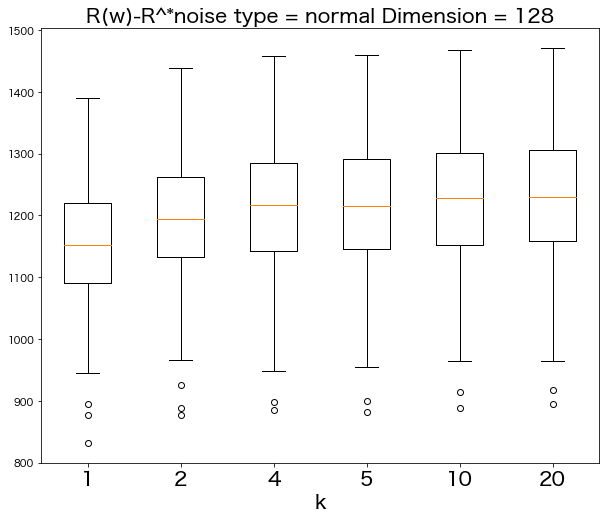

In [3]:
E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1151.174080,1191.700669,1213.889200,1216.912386,1225.245793,1228.643851
std,98.559369,102.546818,103.752345,104.561240,104.964462,105.056413
min,831.848840,876.732519,885.378105,882.627008,889.258003,894.976416
25%,1090.668760,1132.004608,1141.711719,1146.432680,1152.002912,1158.912985
50%,1152.864906,1194.668141,1217.083998,1215.878804,1227.613457,1230.400645
75%,1220.732754,1262.873850,1284.428112,1291.747668,1301.361022,1305.569700
max,1389.380676,1438.223017,1457.528763,1458.840717,1468.215087,1471.440364


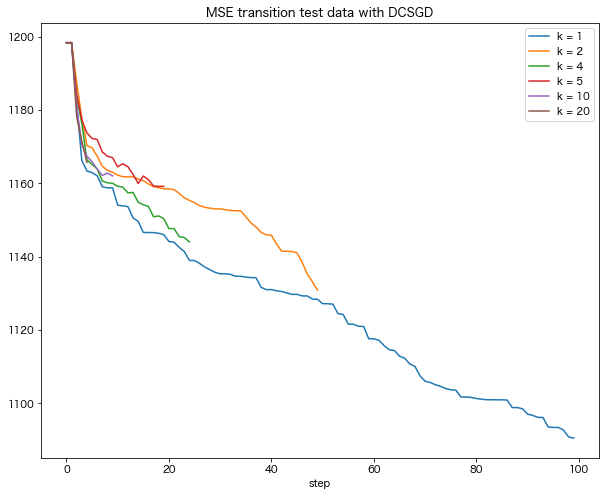

In [5]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

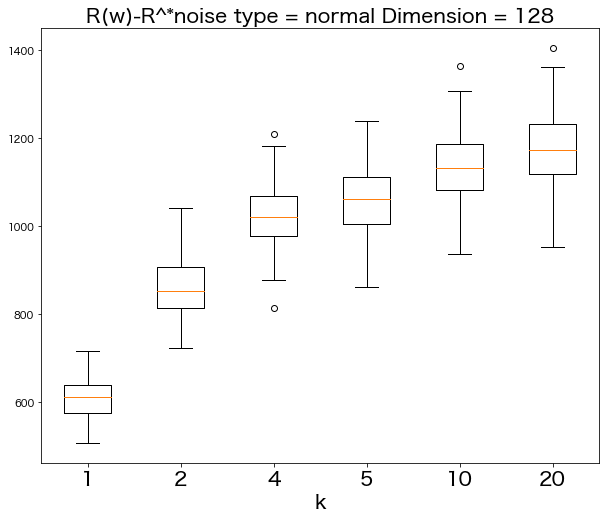

In [6]:

E_var = 1.75

n = 1000
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,609.770956,861.043987,1023.734637,1058.765820,1136.023857,1175.353364
std,47.624505,66.541642,76.273001,76.469242,83.303177,86.430671
min,506.215785,722.204046,814.350815,861.429740,936.125767,952.570869
25%,573.533974,814.374586,976.180649,1003.731569,1080.893341,1118.742337
50%,611.723282,852.876446,1021.163771,1060.377531,1132.729284,1173.355757
75%,638.548257,906.751613,1068.136827,1110.975023,1186.876199,1232.818783
max,715.015567,1040.541460,1209.101894,1239.848606,1362.767511,1405.472340


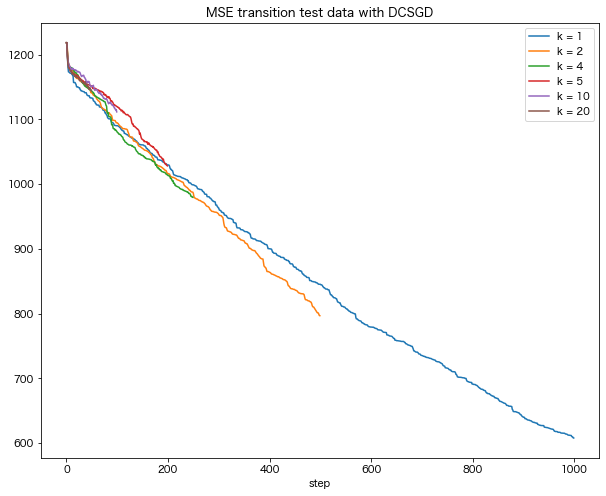

In [8]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

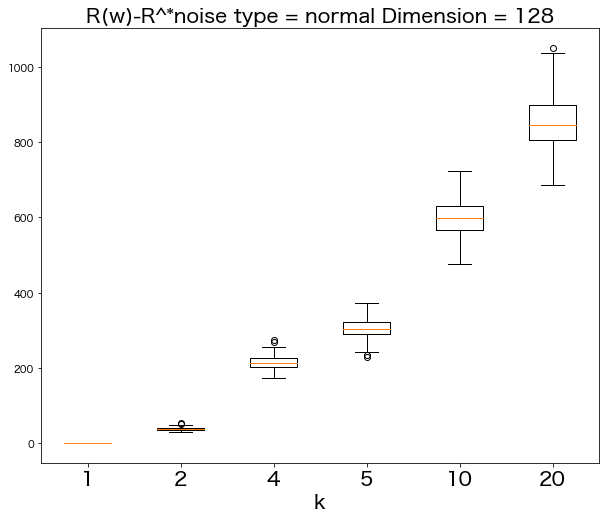

In [9]:

E_var = 1.75
n = 10000
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.853819,39.118812,215.841050,303.531909,603.001850,854.523805
std,0.243405,4.655791,20.410572,25.439015,51.902096,72.465325
min,1.193013,30.428545,174.321496,228.952338,476.512635,686.965744
25%,1.695956,35.678421,202.135525,289.659400,567.719607,806.189333
50%,1.827999,38.502340,214.681712,305.025760,598.206870,845.049117
75%,2.041950,41.609221,227.356725,323.603526,630.775545,898.438828
max,2.433077,54.321226,273.657085,372.137240,723.001047,1050.579066


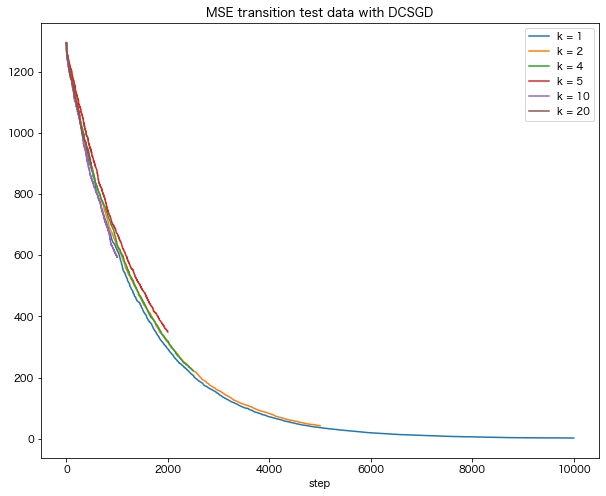

In [11]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

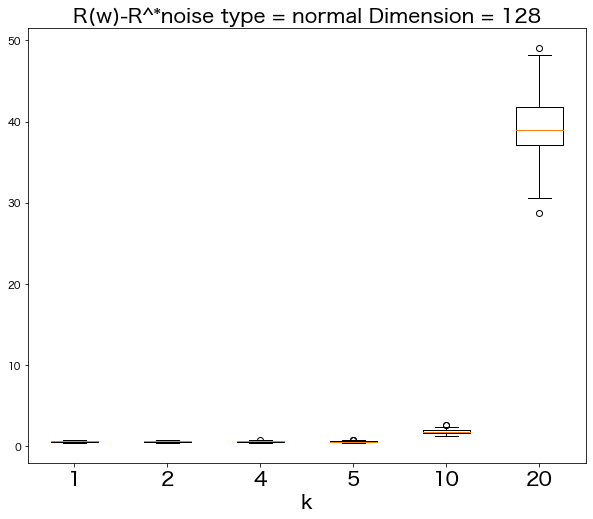

In [12]:

E_var = 1.75
n = 100000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [13]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.604802,0.610438,0.592698,0.594478,1.816868,39.245583
std,0.074476,0.075785,0.075298,0.079049,0.242651,3.892403
min,0.401926,0.425053,0.431371,0.455338,1.282646,28.759191
25%,0.548299,0.549439,0.536683,0.540659,1.661286,37.111639
50%,0.606817,0.610668,0.591915,0.586892,1.799213,38.913731
75%,0.653686,0.672827,0.634508,0.641481,1.947956,41.831991
max,0.758941,0.778664,0.805998,0.835484,2.630922,49.092234


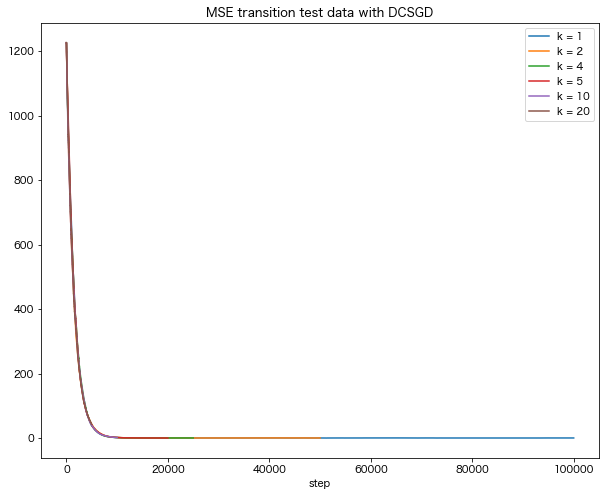

  0%|          | 0/100 [00:00<?, ?it/s]

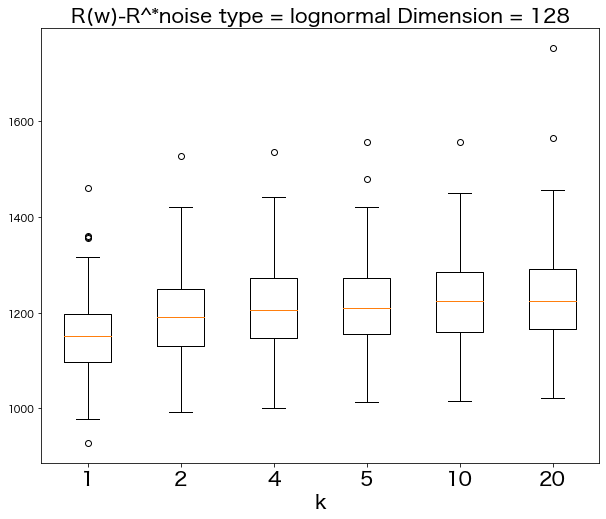

In [14]:
#lognormal noise

noise = "lognormal"
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

E_var = 1.75
n = 100
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [15]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1150.522671,1190.029842,1208.876034,1214.285435,1219.835394,1230.009665
std,95.300269,99.644550,98.912006,103.417982,99.638824,113.765759
min,927.591939,992.953488,1001.784209,1012.930412,1014.695098,1021.637180
25%,1096.820021,1129.788774,1148.018566,1155.354131,1160.282357,1165.483981
50%,1150.467507,1190.301547,1206.487151,1209.533139,1224.158321,1224.506015
75%,1197.682268,1250.198695,1271.767289,1271.844962,1285.941189,1292.336324
max,1460.895835,1528.379388,1536.211347,1556.545853,1557.015256,1754.233868


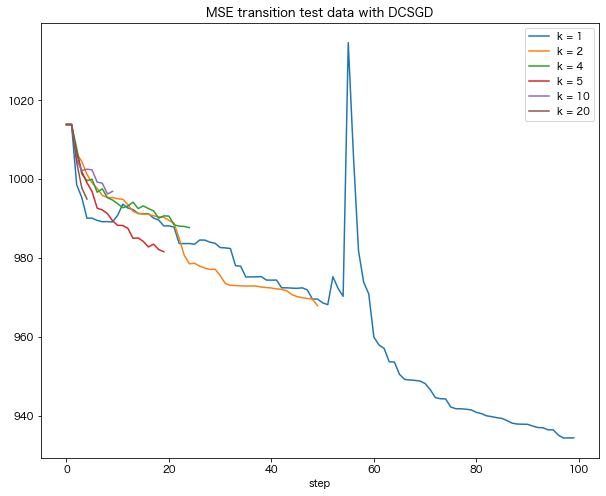

In [16]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

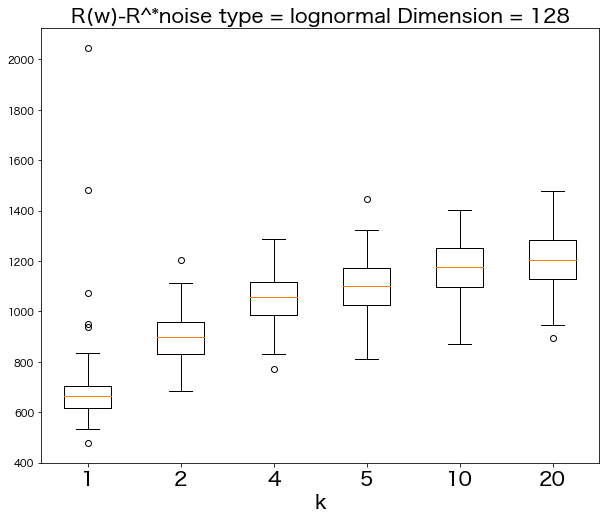

In [17]:

E_var = 1.75
n = 1000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [18]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,690.559717,899.634478,1055.321852,1099.498964,1169.346364,1204.448193
std,181.929553,91.090679,99.474029,107.550276,106.536838,113.402889
min,477.370106,682.231151,769.232735,811.298571,872.337138,892.561851
25%,615.685946,831.791570,984.022288,1025.465453,1096.156991,1128.261561
50%,665.184697,900.188538,1056.308383,1098.981271,1177.732124,1205.721073
75%,705.541455,957.330254,1117.228980,1173.449361,1250.556480,1282.309163
max,2046.510845,1203.084518,1286.449790,1445.251775,1403.539117,1477.487552


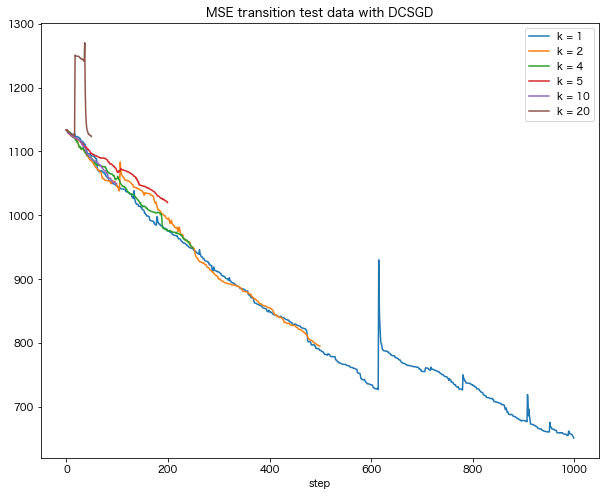

In [19]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

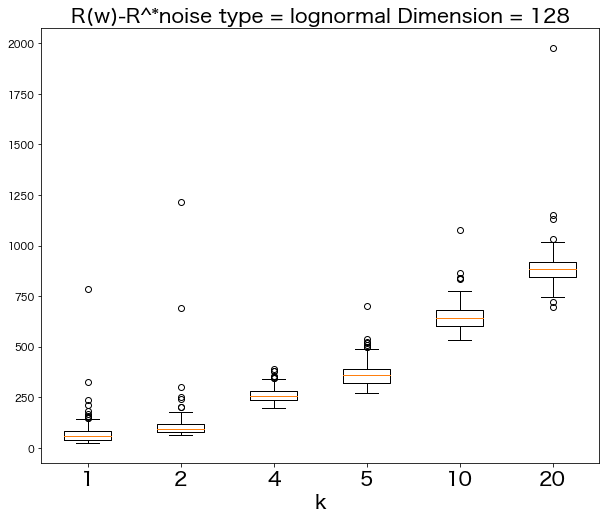

In [20]:

E_var = 1.75
n = 10000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [21]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,78.088506,121.799447,264.403403,367.323010,651.194771,893.254836
std,86.312718,131.664732,39.950412,68.876338,79.793284,132.688436
min,23.664773,61.122833,197.616616,269.157521,530.612677,695.287413
25%,40.640902,80.296743,236.185941,319.772611,600.599756,844.659921
50%,56.574680,93.506731,255.431497,359.051794,640.694475,886.174182
75%,82.964455,119.637650,279.638376,389.448504,682.433014,918.082881
max,786.292351,1215.318979,388.479765,701.365207,1078.170392,1978.090373


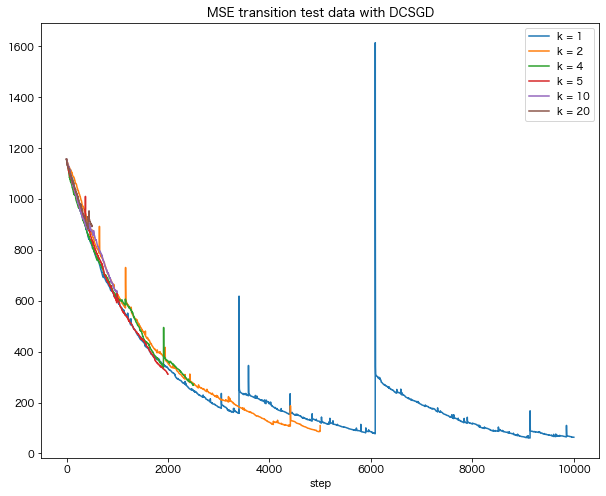

In [22]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

In [ ]:

E_var = 1.75
n = 100000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

In [ ]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)